In [ ]:
# author: Jing 
# date: March 2rd 2019
# function: build regression model fit tcga data
#           feature selection to find most related features

In [3]:
%matplotlib inline
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import scipy.io as sio
from matplotlib.pyplot import savefig
import matplotlib
import pandas as pd

Automatically created module for IPython interactive environment


In [4]:
#author: Jing . jing.wang@mssm.edu
#function: find correlations among genes and cancer types
matrix = np.loadtxt('data_gene_TCGA_LF_v2.txt', usecols=range(301))
matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         8.        ,  0.0476877 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         8.        ,  0.61412104],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         8.        ,  0.23574519],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        14.        ,  0.13398047],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         5.        ,  0.46503909],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         4.        ,  0.36543182]])

In [4]:
matrix.shape

(8643, 301)

In [5]:
gene = matrix[:,0:299]
cancer = matrix[:,299:300]
lf = matrix[:,300]
np.unique(cancer)
cancer

array([[ 8.],
       [ 8.],
       [ 8.],
       ...,
       [14.],
       [ 5.],
       [ 4.]])

In [6]:
fr_matrix = np.genfromtxt('fr_data_gene_TCGA_LF_v2.txt', dtype='str',delimiter='\t')
gene_names = fr_matrix[1:-2] #get gene names by removing symbol, TCGA Study and leukocyte fraction
gene_index_name = {}  # index is the same index in gene
for i in range(0,gene_names.shape[0]):
    gene_index_name[i] = gene_names[i][0]
gene_names

array([['ABL1', '1'],
       ['ACVR1', '2'],
       ['ACVR1B', '3'],
       ['ACVR2A', '4'],
       ['AJUBA', '5'],
       ['AKT1', '6'],
       ['ALB', '7'],
       ['ALK', '8'],
       ['AMER1', '9'],
       ['APC', '10'],
       ['APOB', '11'],
       ['AR', '12'],
       ['ARAF', '13'],
       ['ARHGAP35', '14'],
       ['ARID1A', '15'],
       ['ARID2', '16'],
       ['ARID5B', '17'],
       ['ASXL1', '18'],
       ['ASXL2', '19'],
       ['ATF7IP', '20'],
       ['ATM', '21'],
       ['ATR', '22'],
       ['ATRX', '23'],
       ['ATXN3', '24'],
       ['AXIN1', '25'],
       ['AXIN2', '26'],
       ['B2M', '27'],
       ['BAP1', '28'],
       ['BCL2', '29'],
       ['BCL2L11', '30'],
       ['BCOR', '31'],
       ['BRAF', '32'],
       ['BRCA1', '33'],
       ['BRCA2', '34'],
       ['BRD7', '35'],
       ['BTG2', '36'],
       ['CACNA1A', '37'],
       ['CARD11', '38'],
       ['CASP8', '39'],
       ['CBFB', '40'],
       ['CBWD3', '41'],
       ['CCND1', '42'],
       ['CD70',

In [7]:
gene_names[:,0]

array(['ABL1', 'ACVR1', 'ACVR1B', 'ACVR2A', 'AJUBA', 'AKT1', 'ALB', 'ALK',
       'AMER1', 'APC', 'APOB', 'AR', 'ARAF', 'ARHGAP35', 'ARID1A',
       'ARID2', 'ARID5B', 'ASXL1', 'ASXL2', 'ATF7IP', 'ATM', 'ATR',
       'ATRX', 'ATXN3', 'AXIN1', 'AXIN2', 'B2M', 'BAP1', 'BCL2',
       'BCL2L11', 'BCOR', 'BRAF', 'BRCA1', 'BRCA2', 'BRD7', 'BTG2',
       'CACNA1A', 'CARD11', 'CASP8', 'CBFB', 'CBWD3', 'CCND1', 'CD70',
       'CD79B', 'CDH1', 'CDK12', 'CDK4', 'CDKN1A', 'CDKN1B', 'CDKN2A',
       'CDKN2C', 'CEBPA', 'CHD3', 'CHD4', 'CHD8', 'CHEK2', 'CIC', 'CNBD1',
       'COL5A1', 'CREB3L3', 'CREBBP', 'CSDE1', 'CTCF', 'CTNNB1', 'CTNND1',
       'CUL1', 'CUL3', 'CYLD', 'CYSLTR2', 'DACH1', 'DAZAP1', 'DDX3X',
       'DHX9', 'DIAPH2', 'DICER1', 'DMD', 'DNMT3A', 'EEF1A1', 'EEF2',
       'EGFR', 'EGR3', 'EIF1AX', 'ELF3', 'EP300', 'EPAS1', 'EPHA2',
       'EPHA3', 'ERBB2', 'ERBB3', 'ERBB4', 'ERCC2', 'ESR1', 'EZH2',
       'FAM46D', 'FAT1', 'FBXW7', 'FGFR1', 'FGFR2', 'FGFR3', 'FLNA',
       'FLT3', 'FOXA

In [141]:
cancer_name = np.loadtxt('TCGA_index.txt', dtype='str',delimiter='\t')
cancer_label_name = {} # the label of cancer type start from 1
for i in range(0, cancer_name.shape[0]):
    cancer_label_name[i+1] = cancer_name[i][1]
#cancer_label_name

In [67]:
cancer_label_ind = {}
cancer_num_dist = list(range(len(cancer_label_name)))
len(cancer_num_dist)
cancer.shape[0]

8643

In [68]:
for i in range(0, len(cancer_label_name)): 
    out = np.where(cancer==i+1)
    cancer_label_ind[i+1] = out[0]  
    cancer_num_dist[i] = len(out[0])

In [71]:
len(cancer_num_dist)

30

In [234]:
cancer_name=list(cancer_label_name.values())


['ACC',
 'BLCA',
 'BRCA',
 'CESC',
 'CHOL',
 'COAD',
 'ESCA',
 'GBM',
 'HNSC',
 'KICH',
 'KIRC',
 'KIRP',
 'LGG',
 'LIHC',
 'LUAD',
 'LUSC',
 'MESO',
 'OV',
 'PAAD',
 'PCPG',
 'PRAD',
 'READ',
 'SARC',
 'SKCM',
 'STAD',
 'TGCT',
 'THCA',
 'UCEC',
 'UCS',
 'UVM']

In [135]:
# plot distribution 
freq_series = pd.Series(cancer_num_dist)
x_labels = cancer_name

# Plot the figure.
plt.figure(figsize=(15, 10))
font_size = 22
ax = freq_series.plot(kind='bar')
ax.set_title('Amount Frequency')
ax.set_xlabel('TCGA Study')
ax.set_ylabel('Frequency')
ax.set_xticklabels(x_labels)
ax.set_yticks(list(range(0,1100,200)))
rects = ax.patches

# Make some labels.
labels = cancer_num_dist
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
matplotlib.rcParams.update({'font.size': 22 })
#plt.savefig("./Figures/distribute_cancer.pdf",bbox_inches='tight', 
#           transparent=False,pad_inches=0.1)
#plt.show()

In [195]:
# linear regression based on gene and L whole dataset
x = np.concatenate((gene, cancer), axis=1)
x = gene
y = lf
ridge_regr = linear_model.Ridge(alpha=.05)
ridge_regr.fit(x, lf)
coef = np.transpose(ridge_regr.coef_)
abs_coef = abs(coef)
abs_sort_list = sorted(range(len(coef)), key=lambda k: abs_coef[k],reverse=True)

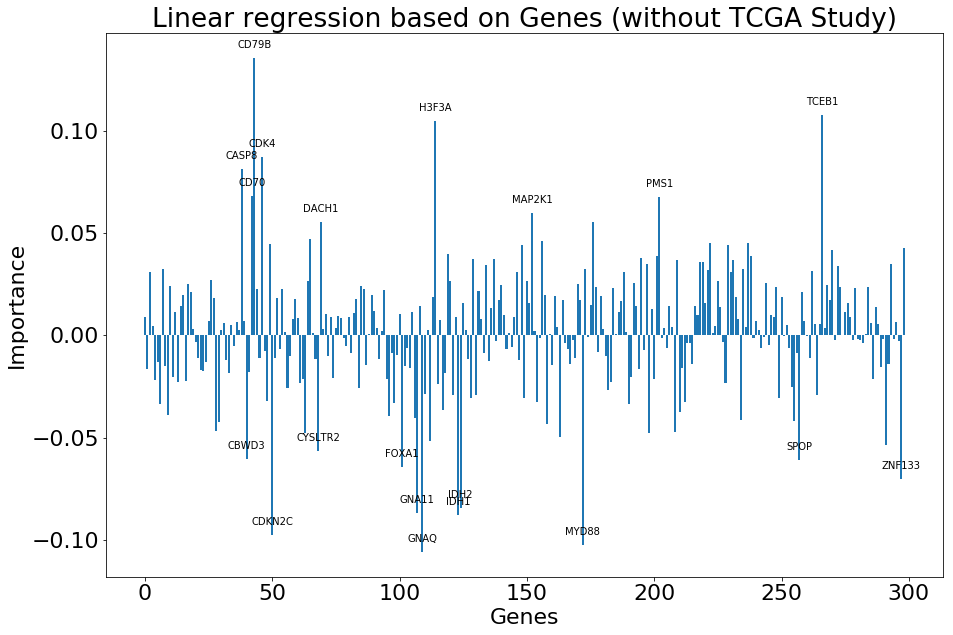

In [200]:
plt.figure(figsize=(15, 10))
font_size = 22
x_label = list(range(0,len(coef)))
plt.title('Linear regression based on Genes (without TCGA Study)')
plt.xlabel('Genes')
plt.ylabel('Importance')
plt.bar(x_label, coef)
matplotlib.rcParams.update({'font.size': 22 })
num_features = 20
labels = gene_names[abs_sort_list[0:num_features],0]
k = 0
for x_loc,y_loc in zip([x_label[i] for i in abs_sort_list[0:num_features]], [coef[i] for i in abs_sort_list[0:num_features]]):
    label = labels[k]
    k = k+1
    plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 fontsize=10) 
#plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.savefig("./Figures/linearregression_gene_lf.pdf",bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
plt.show()


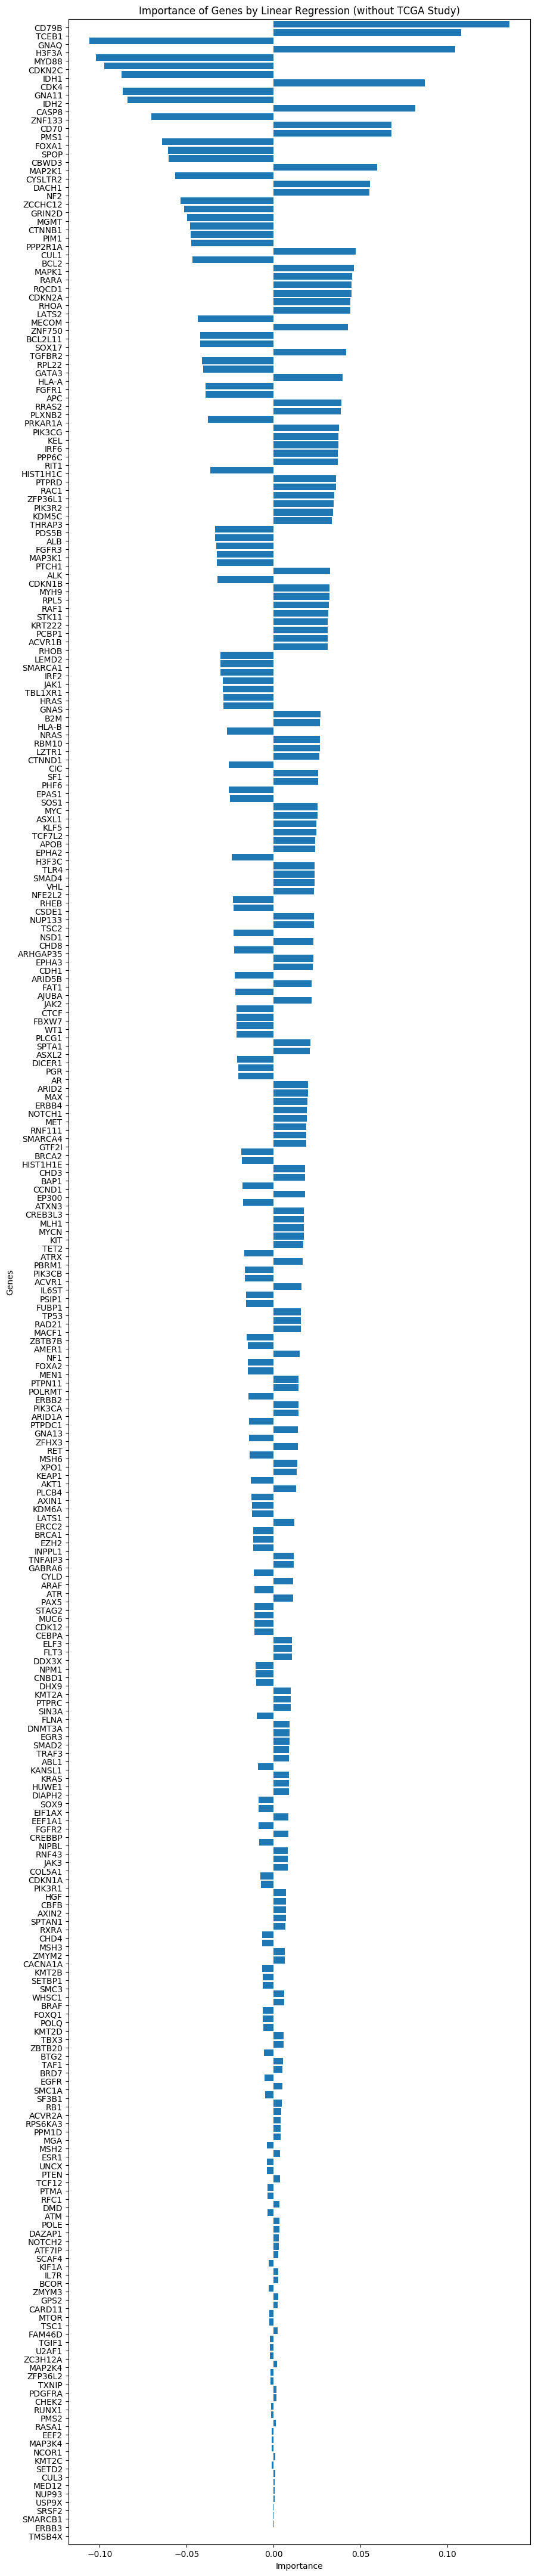

In [231]:
import matplotlib.pyplot as plt; plt.rcdefaults()
reverse_abs_sort_list = abs_sort_list
reverse_abs_sort_list.reverse()

objects = [gene_names[i,0] for i in reverse_abs_sort_list]
y_pos = np.arange(len(objects))
performance = [coef[i] for i in reverse_abs_sort_list]
plt.figure(figsize=(10, 55))

plt.barh(y_pos, performance, align='edge')
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Genes')
plt.title('Importance of Genes by Linear Regression (without TCGA Study)')
plt.ylim(min(y_pos)-1, max(y_pos)+1) #This will reduce the margins to a half-a-bar width.
plt.savefig("./Figures/linearregression_gene.pdf",bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
plt.show()

In [268]:
# run linear regression by different classes
font_size = 22
x_label = list(range(0,len(coef)))
num_features = 20
cancer_coeffs = []
for i in range(0, len(cancer_num_dist)):
    cancer_index = cancer_label_ind[i+1]
    name = cancer_name[i]
    rregr = linear_model.Ridge(alpha=.05)
    rregr.fit([gene[j,:] for j in cancer_index], [lf[j] for j in cancer_index])
    cancer_coef = np.transpose(rregr.coef_)
    cancer_abs_coef = abs(cancer_coef)
    cancer_absSortlist = sorted(range(len(cancer_abs_coef)), key=lambda k: cancer_abs_coef[k],reverse = True)
    print(name, end = ': ', flush=True)
    print(i+1, end=': ', flush=True)    
    for x in cancer_absSortlist[0:10]:
        print(x, end=' ', flush=True)
    print('\n')
    #plot figures  
    '''
    plt.figure(figsize=(15, 10))
    plt.title("Linear regression based on Genes "+ name)
    plt.xlabel('Genes')
    plt.ylabel('Importance')
    plt.bar(x_label, cancer_coef)
    matplotlib.rcParams.update({'font.size': 22 })
    labels = gene_names[cancer_absSortlist[0:num_features],0]
    k = 0
    for x_loc,y_loc in zip([x_label[i] for i in cancer_absSortlist[0:num_features]], [cancer_coef[i] for i in cancer_absSortlist[0:num_features]]):
        label = labels[k]
        k = k+1
        plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 fontsize=10) 
        plt.savefig("./Figures/linearregression_gene_lf_" + cancer_name[i] + ".pdf",bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
        #plt.show()
    '''

ACC: 1: 193 105 151 21 210 122 49 243 224 118 

BLCA: 2: 286 57 126 227 93 2 226 288 7 86 

BRCA: 3: 19 113 68 128 82 134 227 252 152 219 

CESC: 4: 152 240 286 225 117 264 102 34 200 151 

CHOL: 5: 159 223 278 222 6 182 27 31 283 62 

COAD: 6: 214 1 130 215 285 59 231 111 29 291 

ESCA: 7: 91 180 82 11 206 262 294 56 251 200 

GBM: 8: 290 199 292 162 245 131 96 100 252 13 

HNSC: 9: 93 191 146 18 293 297 48 269 184 182 

KICH: 10: 224 168 148 182 258 94 278 99 21 259 

KIRC: 11: 226 254 125 82 137 205 17 31 154 272 

KIRP: 12: 53 246 240 252 75 130 234 0 61 85 

LGG: 13: 258 207 146 282 90 270 20 31 137 257 

LIHC: 14: 201 227 22 2 85 216 194 264 64 143 

LUAD: 15: 228 183 147 277 124 255 59 280 270 197 

LUSC: 16: 77 252 68 101 289 268 161 229 188 215 

MESO: 17: 80 213 105 182 92 201 265 280 31 245 

OV: 18: 261 70 81 74 65 246 271 176 117 155 

PAAD: 19: 94 240 38 10 144 175 160 31 162 281 

PCPG: 20: 152 9 284 258 19 52 94 61 226 273 

PRAD: 21: 250 100 127 252 89 75 260 272 290 1